# Customer Segmentation (RFM) using K-Mean Clustering

## Initialize

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%xmode Minimal

Exception reporting mode: Minimal


## Data Pre-Processing

In [3]:
df=pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

**Note:** `InvoiceDate` needs to be in date-time data

In [5]:
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

In [6]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### Recency Data Curate

In [7]:
latestDate = df.InvoiceDate.max()
latestDate

Timestamp('2011-12-09 12:50:00')

In [8]:
maxdate = df.groupby(["CustomerID"]).max()[['InvoiceDate']]
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [9]:
maxdate['InvoiceRecency'] = (latestDate - maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,InvoiceRecency
CustomerID,,
12346.0,2011-01-18 10:17:00,325
12347.0,2011-12-07 15:52:00,1
12348.0,2011-09-25 13:13:00,74
12349.0,2011-11-21 09:51:00,18
12350.0,2011-02-02 16:01:00,309
...,...,...
18280.0,2011-03-07 09:52:00,277
18281.0,2011-06-12 10:53:00,180
18282.0,2011-12-02 11:43:00,7


In [10]:
recency = maxdate.drop('InvoiceDate', axis=1)
recency

,InvoiceRecency
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309
...,...
18280.0,277
18281.0,180
18282.0,7


### Frequency Data Curate

In [11]:
freq=df.drop_duplicates(subset="InvoiceNo")
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom


In [12]:
freq = freq.groupby(["CustomerID"]).count()[["InvoiceNo"]]
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


### Monetary Data Curate

In [13]:
df["total"]=df["Quantity"]*df["UnitPrice"]

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [15]:
money=df.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


**Note:** Previously noticed CustomerID 12346 has 2 invoices but the total is 0 here! Let's find out what's the reason behind this.

In [16]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


It seems like the order of InvoiceNo 541431 by CustomerID 12346 was cancelled!

### Prepare the Data for Model

In [17]:
RFM=pd.concat([recency,freq,money], axis=1)
RFM

,InvoiceRecency,InvoiceNo,total
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


In [18]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


## Model Development

### Scaling the Data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)
scaled

array([[ 2.32202285, -0.32936215, -0.23100099],
       [-0.89373323,  0.20610242,  0.29343167],
       [-0.1691956 , -0.11517632, -0.01231622],
       ...,
       [-0.83418219, -0.22226923, -0.20951263],
       [-0.87388289,  1.16993863,  0.02390005],
       [-0.48680114, -0.22226923, -0.00744423]])

### Find the optimal value of K (Elbow Method)

In [20]:
from sklearn.cluster import KMeans

**By calculating and plotting SSE (sum of squared error) for number of clusters 1 to 10**

In [21]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k) 
    km.fit(scaled)
    sse.append(km.inertia_)

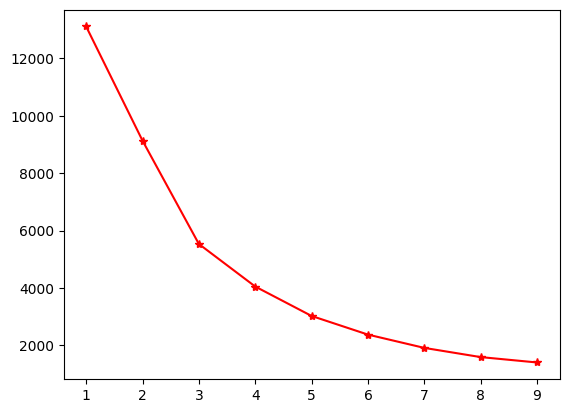

In [22]:
plt.plot(k_range, sse, 'r-*')
plt.xlabel ='k'
plt.ylabel = 'Sum of Squared Error'

**Note:** From the plot, optimal value of K can be 3 or 4. Let's choose 3 to segment customers in three groups: General, Silver, Gold.

### Model Training

In [23]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)

KMeans(n_clusters=3)

## Result Curate

In [24]:
RFM["Clusters"]=(kmeans.labels_)

In [25]:
RFM.Clusters.unique()

array([0, 1, 2])

**Let's summarize the data to see which Cluster is of What kind**

In [26]:
final=RFM.groupby("Clusters").mean()[["Recency","Frequency","Monetary"]]
final

,Recency,Frequency,Monetary
Clusters,,,
0,244.895495,1.853153,460.148037
1,38.933930,5.598950,1823.734725
2,5.086957,86.869565,81835.857391


**Note:** From the summary:
- 2 should be 'Gold'
- 1 should be 'Silver'
- 0 should be 'General'

In [27]:
def func(row):
    if row["Clusters"]==2:
        return 'Gold'
    elif row["Clusters"]==1:
        return 'Silver'
    else:
        return 'General'

In [28]:
RFM['Group']=RFM.apply(func, axis=1)

In [29]:
RFM

,Recency,Frequency,Monetary,Clusters,Group
CustomerID,,,,,
12346.0,325,2,0.00,0,General
12347.0,1,7,4310.00,1,Silver
12348.0,74,4,1797.24,1,Silver
12349.0,18,1,1757.55,1,Silver
12350.0,309,1,334.40,0,General
...,...,...,...,...,...
18280.0,277,1,180.60,0,General
18281.0,180,1,80.82,0,General
18282.0,7,3,176.60,1,Silver


**Number of Customers in each group:**

In [30]:
result=RFM.Group.value_counts()
result

Group
Silver     3239
General    1110
Gold         23
Name: count, dtype: int64

<Axes: xlabel='Group'>

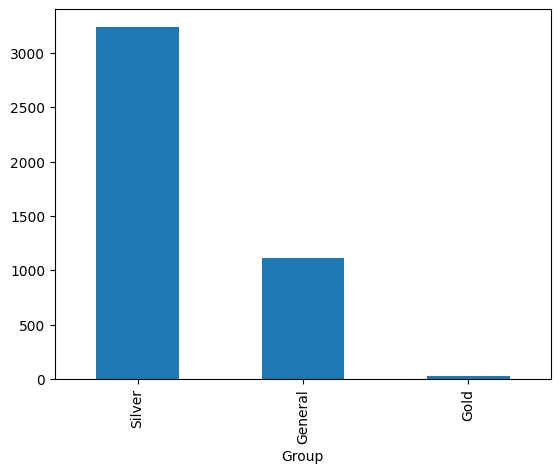

In [31]:
result.plot(kind="bar")

## Find the Customer Status by Entering Customer ID

### Define the Function

In [32]:
def find_customer_group(CustomerID):
    try:
        group = RFM.loc[CustomerID, 'Group']
        return group
    except KeyError:
        return "Customer ID not found"

def main():
    while True:
        customer_id = input("Enter Customer ID (or type 'stop' to exit): ")
        
        if customer_id.lower() == 'stop':
            print("Exiting... Thanks!")
            break
        
        try:
            customer_id_float = float(customer_id)
            group = find_customer_group(customer_id_float)
            print("Customer Group:", group)
        except ValueError:
            print("Invalid input. Please enter a valid Customer ID.")

### User Interaction

In [33]:
main()

Enter Customer ID (or type 'stop' to exit):  18282


Customer Group: Silver


Enter Customer ID (or type 'stop' to exit):  14562


Customer Group: Silver


Enter Customer ID (or type 'stop' to exit):  12846


Customer Group: Customer ID not found


Enter Customer ID (or type 'stop' to exit):  16999


Customer Group: Silver


Enter Customer ID (or type 'stop' to exit):  14752


Customer Group: Silver


Enter Customer ID (or type 'stop' to exit):  123655


Customer Group: Customer ID not found


Enter Customer ID (or type 'stop' to exit):  12655


Customer Group: Customer ID not found


Enter Customer ID (or type 'stop' to exit):  14559


Customer Group: Customer ID not found


Enter Customer ID (or type 'stop' to exit):  15668


Customer Group: General


Enter Customer ID (or type 'stop' to exit):  14785


Customer Group: Silver


Enter Customer ID (or type 'stop' to exit):  16893


Customer Group: General


Enter Customer ID (or type 'stop' to exit):  1455


Customer Group: Customer ID not found


Enter Customer ID (or type 'stop' to exit):  Stop


Exiting... Thanks!
